Final Project LTST FINANCE

--First bring relevant datasets (TOP 10 TECH STOCKS).
--Include Qualitative and Quantitative data (merge them).

**Mini ETL Process

--BUILD THE RNN LTST NETWORK
--SPLIT DATA SET
-- TRAIN MODEL

**POSSIBILITY FOR LLM FINE TUNING

In [558]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import finnhub
import json
import yfinance
import mplfinance as mpf
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import talib

In [559]:
def buy_sell(dataframe):

    temporary_dataframe = pd.DataFrame(dataframe['Close'])
    temporary_dataframe = temporary_dataframe.drop(index='2021-09-30')
    temporary_dataframe =  temporary_dataframe.dropna()
    temporary_dataframe.reset_index(drop=True)

    dataframe = dataframe.drop(index='2022-09-29')
    dataframe =  dataframe.dropna()

    temporary_dataframe.index = dataframe.index

    dataframe['ShiftedClose'] = temporary_dataframe
    dataframe['BSInd'] = 'NaN'

    dataframe.loc[dataframe['Close'] > dataframe['ShiftedClose'], 'BSInd'] = 0
    dataframe.loc[dataframe['Close'] <= dataframe['ShiftedClose'], 'BSInd'] = 1

    dataframe = dataframe.drop('ShiftedClose', axis=1)

    return dataframe


In [560]:
def clean_sentiment(originaldf, sentimentdf, Ticker):
    sentimentdf = pd.DataFrame(sentimentdf)
    sentimentdf = sentimentdf[sentimentdf['Stock Name'] == Ticker]
    sentimentdf = sentimentdf.loc[sentimentdf['Date'].isin(originaldf.index)]
    sentimentdf = sentimentdf.rename(columns={'AvSntm': Ticker + 'AVST'})
    sentimentdf = sentimentdf.drop('Stock Name', axis=1)
    return sentimentdf

In [561]:
finnhub_client = finnhub.Client(api_key="ct5s8spr01qp4ur8b2bgct5s8spr01qp4ur8b2c0")

json_nvda = finnhub_client.company_profile2(symbol='NVDA')
json_aapl = finnhub_client.company_profile2(symbol='AAPL')
json_msft = finnhub_client.company_profile2(symbol='MSFT')
json_goog = finnhub_client.company_profile2(symbol='GOOG')

series_nvda = pd.Series(json_nvda)
series_aapl = pd.Series(json_aapl)
series_msft = pd.Series(json_msft)
series_goog = pd.Series(json_goog)

data = {"NVDA": series_nvda,
        "AAPL": series_aapl,
        "MSFT": series_msft,
        "GOOG": series_goog}

df = pd.concat(data, axis=1)
df

,NVDA,AAPL,MSFT,GOOG
country,US,US,US,US
currency,USD,USD,USD,USD
estimateCurrency,USD,USD,USD,USD
exchange,NASDAQ NMS - GLOBAL MARKET,NASDAQ NMS - GLOBAL MARKET,NASDAQ NMS - GLOBAL MARKET,NASDAQ NMS - GLOBAL MARKET
finnhubIndustry,Semiconductors,Technology,Technology,Media
ipo,1999-01-22,1980-12-12,1986-03-13,2004-08-19
logo,https://static2.finnhub.io/file/publicdatany/f...,https://static2.finnhub.io/file/publicdatany/f...,https://static2.finnhub.io/file/publicdatany/f...,https://static2.finnhub.io/file/publicdatany/f...
marketCapitalization,3434967.520986,3667854.453654,3205920.708286,2105611.400819
name,NVIDIA Corp,Apple Inc,Microsoft Corp,Alphabet Inc
phone,14084862000,14089961010,14258828080,16502530000


In [562]:
nvda_dataframe = yfinance.download("NVDA", start='2021-09-30', end='2022-09-30', multi_level_index=False)
nvda_dataframe =  nvda_dataframe.drop(['Adj Close'], axis=1)
nvda_dataframe =  buy_sell(nvda_dataframe)

[*********************100%***********************]  1 of 1 completed


In [563]:
nvda_dataframe.describe()

,Close,High,Low,Open,Volume
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,21.889271,22.436088,21.346335,21.911960,5.187303e+08
std,5.504144,5.663012,5.358894,5.555915,1.651627e+08
min,12.228000,12.611000,12.214000,12.410000,1.462760e+08
25%,17.201500,17.926000,16.848500,17.339500,4.233380e+08
50%,21.504000,22.320000,21.122000,21.709000,5.127810e+08
75%,26.503000,26.754500,25.707000,26.212501,6.233895e+08
max,33.375999,34.646999,32.035999,33.516998,1.178865e+09


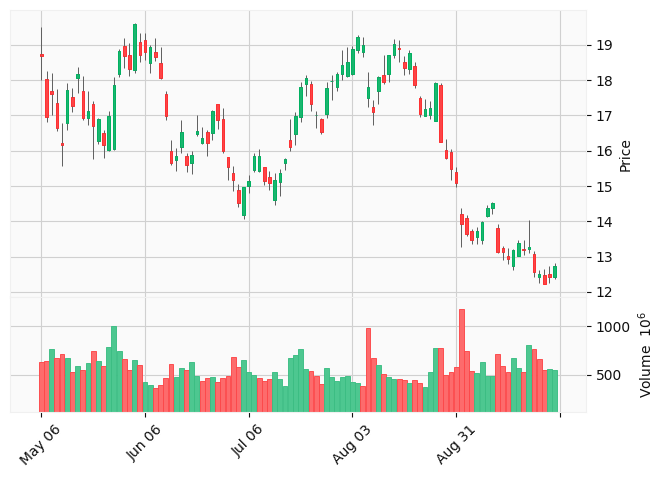

In [564]:
mpf.plot(nvda_dataframe.tail(100),type='candle',style='yahoo',volume=True)

In [565]:
#Overlap Studies
nvda_dataframe['MA'] = talib.MA(nvda_dataframe['Close'],timeperiod=10)
nvda_dataframe['EMA'] = talib.EMA(nvda_dataframe['Close'],timeperiod=10)
nvda_dataframe['DEMA'] = talib.DEMA(nvda_dataframe['Close'],timeperiod=10)
nvda_dataframe['KAMA'] = talib.KAMA(nvda_dataframe['Close'],timeperiod=10)
nvda_dataframe['WMA'] = talib.WMA(nvda_dataframe['Close'],timeperiod=10)
nvda_dataframe['MidPrice'] = talib.MIDPRICE(nvda_dataframe['High'], nvda_dataframe['Low'],timeperiod=10)

#Momentum Indicator
nvda_dataframe['ADX'] = talib.ADX(nvda_dataframe['High'], nvda_dataframe['Low'], nvda_dataframe['Close'], timeperiod=10)
nvda_dataframe['BOP'] = talib.BOP(nvda_dataframe['Open'], nvda_dataframe['High'], nvda_dataframe['Low'], nvda_dataframe['Close'])
nvda_dataframe['CMO'] = talib.CMO(nvda_dataframe['Close'],timeperiod=10)
nvda_dataframe['MFI'] = talib.MFI(nvda_dataframe['High'], nvda_dataframe['Low'], nvda_dataframe['Close'], nvda_dataframe['Volume'])
nvda_dataframe['ROC'] = talib.ROC(nvda_dataframe['Close'],timeperiod=10)
nvda_dataframe['WILLR'] = talib.WILLR(nvda_dataframe['High'], nvda_dataframe['Low'], nvda_dataframe['Close'], timeperiod=14)
nvda_dataframe['ULTOSC'] = talib.ULTOSC(nvda_dataframe['High'], nvda_dataframe['Low'], nvda_dataframe['Close'], timeperiod1=5, timeperiod2=10, timeperiod3=20)

#Volume
nvda_dataframe['AD'] = talib.AD(nvda_dataframe['High'], nvda_dataframe['Low'], nvda_dataframe['Close'], nvda_dataframe['Volume'])
nvda_dataframe['OBV'] = talib.OBV(nvda_dataframe['Close'], nvda_dataframe['Volume'])

#Volatility
nvda_dataframe['NATR'] = talib.NATR(nvda_dataframe['High'], nvda_dataframe['Low'], nvda_dataframe['Close'], timeperiod=14)
nvda_dataframe['ATR'] = talib.ATR(nvda_dataframe['High'], nvda_dataframe['Low'], nvda_dataframe['Close'], timeperiod=14)
nvda_dataframe['TRANGE'] = talib.TRANGE(nvda_dataframe['High'], nvda_dataframe['Low'], nvda_dataframe['Close'])

#Cycle Indicators
nvda_dataframe['HT_DCPERIOD'] = talib.HT_DCPERIOD(nvda_dataframe['Close'])
nvda_dataframe['HT_DCPERIOD'] = nvda_dataframe['HT_DCPERIOD'].fillna(method='bfill')

nvda_dataframe['INPHASE'], nvda_dataframe['QUADRUTURE'] = talib.HT_PHASOR(nvda_dataframe['Close'])
nvda_dataframe['INPHASE'] = nvda_dataframe['INPHASE'].fillna(method='bfill')
nvda_dataframe['QUADRUTURE'] = nvda_dataframe['QUADRUTURE'].fillna(method='bfill')

nvda_dataframe['RSI'] = talib.HT_TRENDMODE(nvda_dataframe['Close'])

#MISC
nvda_dataframe['TSF'] = talib.TSF(nvda_dataframe['Close'], timeperiod=14)

C:\Users\caomd\AppData\Local\Temp\ipykernel_28720\1668902428.py:29: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  nvda_dataframe['HT_DCPERIOD'] = nvda_dataframe['HT_DCPERIOD'].fillna(method='bfill')
C:\Users\caomd\AppData\Local\Temp\ipykernel_28720\1668902428.py:32: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  nvda_dataframe['INPHASE'] = nvda_dataframe['INPHASE'].fillna(method='bfill')
C:\Users\caomd\AppData\Local\Temp\ipykernel_28720\1668902428.py:33: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  nvda_dataframe['QUADRUTURE'] = nvda_dataframe['QUADRUTURE'].fillna(method='bfill')


In [566]:
aapl_dataframe = yfinance.download("AAPL", start='2021-09-30', end='2022-09-30', multi_level_index=False)
aapl_dataframe =  aapl_dataframe.drop(['Adj Close'], axis=1)
aapl_dataframe = buy_sell(aapl_dataframe)

goog_dataframe = yfinance.download("GOOG", start='2021-09-30', end='2022-09-30', multi_level_index=False)
goog_dataframe =  goog_dataframe.drop(['Adj Close'], axis=1)
goog_dataframe =  buy_sell(goog_dataframe)

msft_dataframe = yfinance.download("MSFT", start='2021-09-30', end='2022-09-30', multi_level_index=False)
msft_dataframe =  msft_dataframe.drop(['Adj Close'], axis=1)
msft_dataframe = buy_sell(msft_dataframe)

amzn_dataframe = yfinance.download("AMZN", start='2021-09-30', end='2022-09-30', multi_level_index=False)
amzn_dataframe =  amzn_dataframe.drop(['Adj Close'], axis=1)
amzn_dataframe = buy_sell(amzn_dataframe)

stocks = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
comp_string = 'BSInd'

tech_stocks_indicators = pd.DataFrame()
tech_stocks_indicators[stocks[0] + comp_string] = aapl_dataframe['BSInd']
tech_stocks_indicators[stocks[1] + comp_string] = goog_dataframe['BSInd']
tech_stocks_indicators[stocks[2] + comp_string] = msft_dataframe['BSInd']
tech_stocks_indicators[stocks[3] + comp_string] = amzn_dataframe['BSInd']

nvda2 = pd.merge(nvda_dataframe, tech_stocks_indicators, left_index=True, right_index=True)

pd.concat([nvda2.head(5), nvda2.tail(5)])

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Close,High,Low,Open,Volume,BSInd,MA,EMA,DEMA,KAMA,...,TRANGE,HT_DCPERIOD,INPHASE,QUADRUTURE,RSI,TSF,AAPLBSInd,GOOGBSInd,MSFTBSInd,AMZNBSInd
Date,,,,,,,,,,,,,,,,,,,,,
2021-09-30,20.716000,21.066000,20.688000,20.768000,221009000,1,NaN,NaN,NaN,NaN,...,NaN,15.646696,2.410320,-0.843650,0,NaN,1,1,1,0
2021-10-01,20.742001,20.858999,20.202999,20.750000,240978000,0,NaN,NaN,NaN,NaN,...,0.656000,15.646696,2.410320,-0.843650,0,NaN,0,0,0,0
2021-10-04,19.732000,20.542000,19.555000,20.504000,345635000,1,NaN,NaN,NaN,NaN,...,1.187000,15.646696,2.410320,-0.843650,0,NaN,1,1,1,1
2021-10-05,20.451000,20.648001,19.854000,19.950001,279282000,1,NaN,NaN,NaN,NaN,...,0.916000,15.646696,2.410320,-0.843650,0,NaN,1,1,1,1
2021-10-06,20.700001,20.719999,20.080000,20.120001,297202000,1,NaN,NaN,NaN,NaN,...,0.639999,15.646696,2.410320,-0.843650,0,NaN,1,1,1,1
2022-09-22,12.561000,13.149000,12.428000,13.070000,759162000,0,13.3658,13.380416,12.681787,13.793891,...,0.832999,27.862633,-1.200228,0.277077,1,12.866780,0,0,0,0
2022-09-23,12.516000,12.611000,12.257000,12.420000,663309000,0,13.1787,13.223249,12.523053,13.570114,...,0.354000,27.524308,-0.935759,1.698903,1,12.628824,1,0,0,1
2022-09-26,12.228000,12.659000,12.214000,12.491000,547343000,1,12.9510,13.042295,12.321354,13.269295,...,0.445001,26.959898,-0.129337,1.618448,1,12.313868,1,0,0,0
2022-09-27,12.413000,12.736000,12.258000,12.507000,553854000,1,12.8792,12.927878,12.244402,13.209477,...,0.508000,26.320872,0.045199,0.183497,1,12.136329,0,1,1,1


In [567]:
df_sentiment = pd.read_csv('stock_tweets.csv')

# Initialize sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Perform sentiment analysis
df_sentiment['scores'] = df_sentiment['Tweet'].apply(lambda text: analyzer.polarity_scores(text))
df_sentiment['compound'] = df_sentiment['scores'].apply(lambda score_dict: score_dict['compound'])
df_sentiment['Date'] = pd.to_datetime(df_sentiment['Date']).dt.date

# List of stocks to include
selected_stocks = ['AAPL', 'GOOG', 'MSFT', 'AMZN' , 'NVDA']

# Filter the dataset for the selected stocks
filtered_df = df_sentiment[df_sentiment['Stock Name'].isin(selected_stocks)]
filtered_df['Date'] = pd.to_datetime(filtered_df['Date'])

# Group by Date and Stock Name, calculate the mean compound score
average_sentiment_by_date = (
filtered_df.groupby(['Date', 'Stock Name'], as_index=False)['compound']
.mean()
.rename(columns={'compound': 'AvSntm'})
)

aapl_sentiment = clean_sentiment(nvda2, average_sentiment_by_date, 'AAPL')
goog_sentiment = clean_sentiment(nvda2, average_sentiment_by_date, 'GOOG')
msft_sentiment = clean_sentiment(nvda2, average_sentiment_by_date, 'MSFT')
amzn_sentiment = clean_sentiment(nvda2, average_sentiment_by_date, 'AMZN')

sentiment_tech_two = pd.DataFrame(aapl_sentiment)
sentiment_tech_two = sentiment_tech_two.merge(goog_sentiment, on='Date', how='left')
sentiment_tech_two = sentiment_tech_two.merge(msft_sentiment, on='Date', how='left')
sentiment_tech_two = sentiment_tech_two.merge(amzn_sentiment, on='Date', how='left')

sentiment_tech_two =  sentiment_tech_two.fillna(0)
sentiment_tech_two.index = nvda2.index
sentiment_tech_two = sentiment_tech_two.drop('Date', axis=1)

nvda3 = pd.merge(nvda2, sentiment_tech_two, left_index=True, right_index=True)
pd.concat([nvda3.head(5), nvda3.tail(5)])


C:\Users\caomd\AppData\Local\Temp\ipykernel_28720\3997760020.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Date'] = pd.to_datetime(filtered_df['Date'])


,Close,High,Low,Open,Volume,BSInd,MA,EMA,DEMA,KAMA,...,RSI,TSF,AAPLBSInd,GOOGBSInd,MSFTBSInd,AMZNBSInd,AAPLAVST,GOOGAVST,MSFTAVST,AMZNAVST
Date,,,,,,,,,,,,,,,,,,,,,
2021-09-30,20.716000,21.066000,20.688000,20.768000,221009000,1,NaN,NaN,NaN,NaN,...,0,NaN,1,1,1,0,0.098900,0.440400,0.256980,0.256980
2021-10-01,20.742001,20.858999,20.202999,20.750000,240978000,0,NaN,NaN,NaN,NaN,...,0,NaN,0,0,0,0,0.248255,-0.494350,0.359650,0.359650
2021-10-04,19.732000,20.542000,19.555000,20.504000,345635000,1,NaN,NaN,NaN,NaN,...,0,NaN,1,1,1,1,0.122830,0.197075,0.279425,0.279425
2021-10-05,20.451000,20.648001,19.854000,19.950001,279282000,1,NaN,NaN,NaN,NaN,...,0,NaN,1,1,1,1,0.331000,0.229400,0.134150,0.134150
2021-10-06,20.700001,20.719999,20.080000,20.120001,297202000,1,NaN,NaN,NaN,NaN,...,0,NaN,1,1,1,1,0.243520,-0.219450,0.281471,0.281471
2022-09-22,12.561000,13.149000,12.428000,13.070000,759162000,0,13.3658,13.380416,12.681787,13.793891,...,1,12.866780,0,0,0,0,0.322425,-0.050667,0.359400,0.359400
2022-09-23,12.516000,12.611000,12.257000,12.420000,663309000,0,13.1787,13.223249,12.523053,13.570114,...,1,12.628824,1,0,0,1,0.010358,0.000000,0.050550,0.050550
2022-09-26,12.228000,12.659000,12.214000,12.491000,547343000,1,12.9510,13.042295,12.321354,13.269295,...,1,12.313868,1,0,0,0,0.286159,0.284800,-0.068714,-0.068714
2022-09-27,12.413000,12.736000,12.258000,12.507000,553854000,1,12.8792,12.927878,12.244402,13.209477,...,1,12.136329,0,1,1,1,0.142800,0.000000,-0.186740,-0.186740


In [568]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=17)
nvda4 = imputer.fit_transform(nvda3)
nvda4 = pd.DataFrame(nvda4, columns=nvda3.columns)
pd.concat([nvda4.head(5), nvda4.tail(5)])

,Close,High,Low,Open,Volume,BSInd,MA,EMA,DEMA,KAMA,...,RSI,TSF,AAPLBSInd,GOOGBSInd,MSFTBSInd,AMZNBSInd,AAPLAVST,GOOGAVST,MSFTAVST,AMZNAVST
0,20.716000,21.066000,20.688000,20.768000,221009000.0,1.0,25.313906,25.287498,25.905339,26.013179,...,0.0,25.990915,1.0,1.0,1.0,0.0,0.098900,0.440400,0.256980,0.256980
1,20.742001,20.858999,20.202999,20.750000,240978000.0,0.0,25.730471,25.719042,26.198277,26.200320,...,0.0,26.352604,0.0,0.0,0.0,0.0,0.248255,-0.494350,0.359650,0.359650
2,19.732000,20.542000,19.555000,20.504000,345635000.0,1.0,25.821623,25.788677,25.502907,26.151420,...,0.0,25.574133,1.0,1.0,1.0,1.0,0.122830,0.197075,0.279425,0.279425
3,20.451000,20.648001,19.854000,19.950001,279282000.0,1.0,26.006106,26.021457,26.198277,26.356462,...,0.0,26.352604,1.0,1.0,1.0,1.0,0.331000,0.229400,0.134150,0.134150
4,20.700001,20.719999,20.080000,20.120001,297202000.0,1.0,25.448229,25.467822,26.451210,25.622128,...,0.0,25.965057,1.0,1.0,1.0,1.0,0.243520,-0.219450,0.281471,0.281471
246,12.561000,13.149000,12.428000,13.070000,759162000.0,0.0,13.365800,13.380416,12.681787,13.793891,...,1.0,12.866780,0.0,0.0,0.0,0.0,0.322425,-0.050667,0.359400,0.359400
247,12.516000,12.611000,12.257000,12.420000,663309000.0,0.0,13.178700,13.223249,12.523053,13.570114,...,1.0,12.628824,1.0,0.0,0.0,1.0,0.010358,0.000000,0.050550,0.050550
248,12.228000,12.659000,12.214000,12.491000,547343000.0,1.0,12.951000,13.042295,12.321354,13.269295,...,1.0,12.313868,1.0,0.0,0.0,0.0,0.286159,0.284800,-0.068714,-0.068714
249,12.413000,12.736000,12.258000,12.507000,553854000.0,1.0,12.879200,12.927878,12.244402,13.209477,...,1.0,12.136329,0.0,1.0,1.0,1.0,0.142800,0.000000,-0.186740,-0.186740
250,12.736000,12.823000,12.354000,12.410000,542414000.0,0.0,12.840000,12.892991,12.305240,13.197425,...,1.0,12.142494,0.0,0.0,0.0,0.0,-0.046712,-0.077725,0.418660,0.418660


In [569]:
output_file = "final_dataset.csv" # Update with your desired file path
nvda4.to_csv(output_file, index=False)

Text(0.5, 1.0, 'Correlation Heatmap')

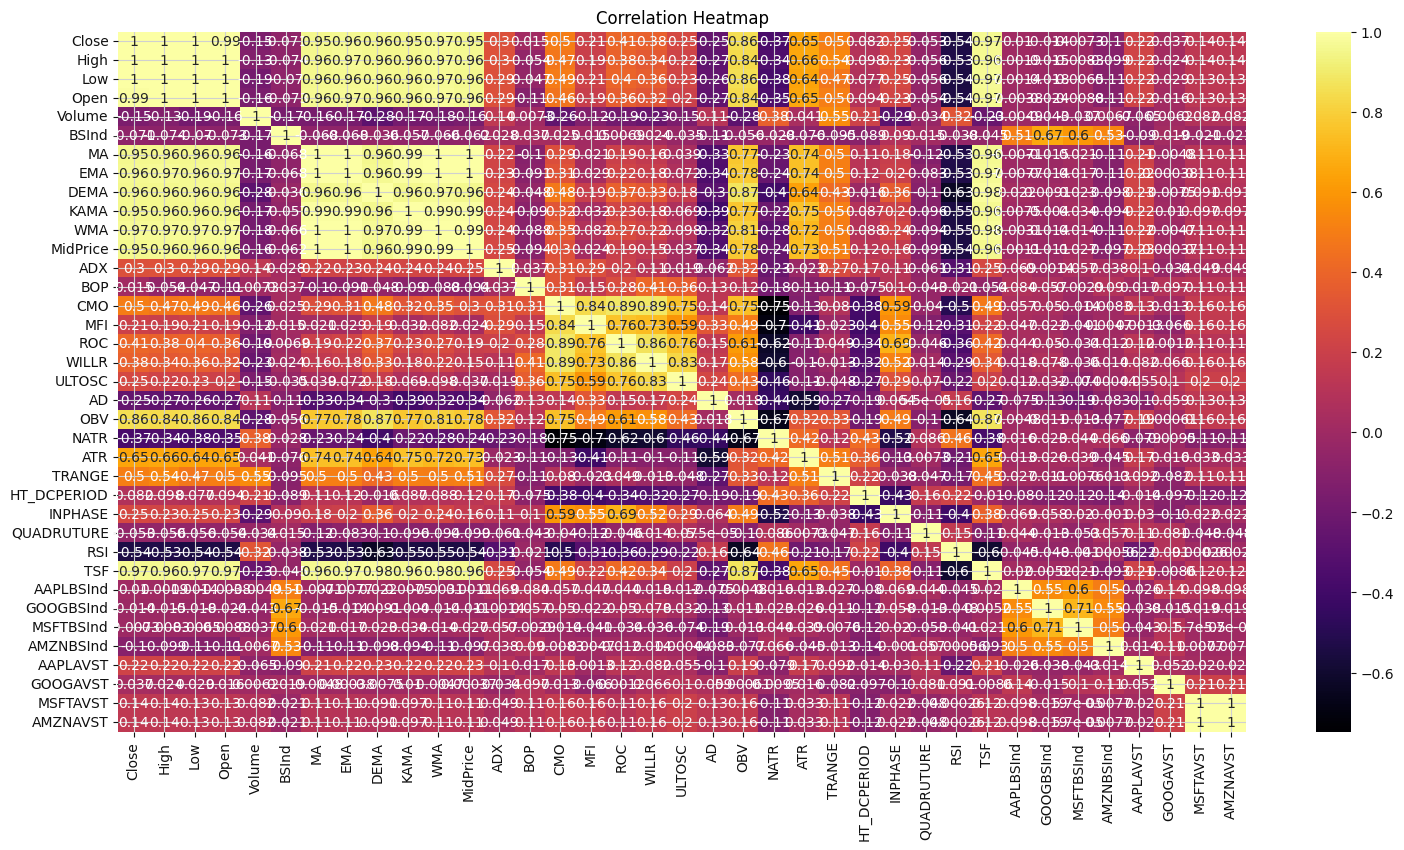

In [570]:
import seaborn as sns

plt.figure(figsize=(40, 20))

plt.subplot(2, 2, 1)
sns.heatmap(nvda4.corr(), annot=True, cmap='inferno')
plt.title('Correlation Heatmap')

In [602]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
import tensorflow.keras.backend as K
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint


#RMSE metric function
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [572]:
#Send Y to back
BSInd = nvda4.pop("BSInd")
position = nvda4.shape
nvda4.insert(position[1], "BSInd", BSInd)

In [612]:
# Create sequences for LSTM: Define time steps
timesteps = 10  # Number of previous days to consider for prediction
X, y = [], []
for i in range(timesteps, len(nvda4)):
    X.append(nvda4.iloc[i-timesteps:i, :-1].values)  # Features for the last `timesteps` days
    y.append(nvda4.iloc[i, -1])  # Target value (Close price) of the current day

# Convert to numpy arrays
X, y = np.array(X), np.array(y)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Now, take 10% of the training data for validation
val_size = int(0.1 * len(X_train))
X_val, y_val = X_train[:val_size], y_train[:val_size]

# Keep the remaining 90% of the data for training
X_train, y_train = X_train[val_size:], y_train[val_size:]

In [613]:
# Build the model
model = Sequential([
    layers.InputLayer(input_shape=(X_train.shape[1], X_train.shape[2])),  # Input shape of (3, 1) for each time step
    layers.LSTM(128, return_sequences=True),  # First LSTM layer with 128 units
    layers.LSTM(64),  # Second LSTM layer with 64 units
    layers.Dense(32, activation='relu'),  # First Dense layer with ReLU activation
    layers.Dense(32, activation='relu'),  # Second Dense layer with ReLU activation
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', 
    optimizer=Adam(learning_rate=0.0003),
    metrics=['accuracy',rmse])  # Use RMSE as the metric

# Define the ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    'coolguys.keras',  # Path where the best model will be saved
    monitor='val_accuracy',  # Metric to monitor (could also be 'val_accuracy')
    mode='max',  # We want to minimize the validation loss
    save_best_only=True,  # Save only the best model based on the monitored metric
    verbose=1  # Print a message when the model is saved
)
# Train the model
model.fit(X_train, y_train, 
    epochs=50, 
    batch_size=32,
    validation_data=(X_val, y_val),  # Add validation data
    callbacks=checkpoint_callback) 

model.load_weights('coolguys.keras')

# Evaluate the model on test data
test_loss, test_accuracy, test_rmse = model.evaluate(X_test, y_test)
print(f"Test Loss (Binary Crossentropy): {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test RMSE: {test_rmse}")

predictions = model.predict(X_test)


c:\Users\caomd\miniconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/50
5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5582 - loss: 0.6898 - rmse: 0.5026
Epoch 1: val_accuracy improved from -inf to 0.26316, saving model to coolguys.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 151ms/step - accuracy: 0.5573 - loss: 0.6902 - rmse: 0.5025 - val_accuracy: 0.2632 - val_loss: 0.7442 - val_rmse: 0.5259
Epoch 2/50
5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5604 - loss: 0.6819 - rmse: 0.5014
Epoch 2: val_accuracy did not improve from 0.26316
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5605 - loss: 0.6814 - rmse: 0.5012 - val_accuracy: 0.2632 - val_loss: 0.7512 - val_rmse: 0.5289
Epoch 3/50
5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5443 - loss: 0.6854 - rmse: 0.5013
Epoch 3: val_accuracy did not improve from 0.26316
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5556 - loss: 0.6822 - rmse: 0.5012 - val_accuracy: 0.2632 - val_loss: 0.7545 - val_rmse: 0.5301
Epoch 4/50
5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6222 - loss:

In [616]:
binary_predictions = (predictions >= 0.5).astype(int)
predicted_actual = pd.DataFrame(binary_predictions, columns=['PredictedV'])
predicted_actual['ActualV'] = nvda4['BSInd']

# Compare predictions with true labels
correct_predictions = np.sum(predicted_actual['PredictedV'] == predicted_actual['ActualV'])
incorrect_predictions = np.sum(predicted_actual['PredictedV'] == predicted_actual['ActualV'])

print(correct_predictions)
print(incorrect_predictions)


21
21
